#### Polynomial regression for trq_margin

##### LinearRegression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Caricamento dei dati da CSV
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# 2. Selezioniamo solo la colonna 'trq_target' come target
y = X_train_target['trq_target'].values

# 3. Creiamo la matrice delle caratteristiche (escludiamo 'trq_measured')
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# 4. Suddivisione dei dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Creazione del modello di regressione lineare
model = LinearRegression()

# 6. Addestramento del modello
print("Inizio dell'addestramento del modello di regressione lineare...")
model.fit(X_train, y_train)

# 7. Predizione
y_pred = model.predict(X_test)

# 8. Valutazione
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Inizio dell'addestramento del modello di regressione lineare...
Mean Squared Error: 0.637817940239142
R^2: 0.5021571017282551


##### Grid Search

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caricamento dei dati
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# Selezioniamo la variabile target e le feature
y = X_train_target['trq_target']
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# Suddividiamo il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per la Regressione Lineare
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Inizializzazione del modello
lr_model = LinearRegression()

# Eseguiamo la GridSearch
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per la Regressione Lineare: {grid_search_lr.best_params_}")

# Predizione e valutazione
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error per la Regressione Lineare: {mse_lr}')
print(f'R^2 per la Regressione Lineare: {r2_lr}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV] END ................................fit_intercept=False; total time=   0.2s
[CV] END .................................fit_intercept=True; total time=   0.2s
[CV] END .................................fit_intercept=True; total time=   0.2s
[CV] END .................................fit_intercept=True; total time=   0.2s
[CV] END ................................fit_intercept=False; total time=   0.2s
[CV] END .................................fit_intercept=True; total time=   0.2s
[CV] END .................................fit_intercept=True; total time=   0.2s
[CV] END ................................fit_intercept=False; total time=   0.2s
[CV] END ................................fit_intercept=False; total time=   0.2s
[CV] END ................................fit_intercept=False; total time=   0.2s
Migliori parametri per la Regressione Lineare: {'fit_intercept': False}
Mean Squared Error per la Regressione Lineare: 0.6378162318363658
R^2 per la Regressione Lineare: 0.5021584352062523


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Decision Tree Regressor
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Inizializzazione del modello
dt_model = DecisionTreeRegressor(random_state=42)

# Eseguiamo la GridSearch
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Decision Tree Regressor: {grid_search_dt.best_params_}")

# Predizione e valutazione
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error per il Decision Tree Regressor: {mse_dt}')
print(f'R^2 per il Decision Tree Regressor: {r2_dt}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_fea

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Random Forest Regressor
rf_param_grid = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la GridSearch
#grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {grid_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.9min
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2

KeyboardInterrupt: 

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Random Forest Regressor
rf_param_grid = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la GridSearch
#grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {grid_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Migliori parametri per il Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error per il Random Forest Regressor: 0.16530614351571077
R^2 per il Random Forest Regressor: 0.8709718175077823


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Parametri per il Random Forest Regressor
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],  # None significa che non viene imposta alcuna profondità massima
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=rf_param_dist, 
    n_iter=50,  # Numero di combinazioni casuali da esplorare
    cv=3, 
    n_jobs=-1,  # Utilizza tutti i core disponibili
    verbose=2, 
    random_state=42
)

# Esegui la RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {random_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per l'XGBoost Regressor
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Inizializzazione del modello
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Eseguiamo la GridSearch
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per l'XGBoost Regressor: {grid_search_xgb.best_params_}")

# Predizione e valutazione
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error per l\'XGBoost Regressor: {mse_xgb}')
print(f'R^2 per l\'XGBoost Regressor: {r2_xgb}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Migliori parametri per l'XGBoost Regressor: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error per l'XGBoost Regressor: 0.17326962140503294
R^2 per l'XGBoost Regressor: 0.864755998443087


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Polynomial Regressor
poly_param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Grado del polinomio
    'linearregression__fit_intercept': [True, False],  # Se includere l'intercetta nel modello
}

# Creiamo un modello che include il PolynomialFeatures seguito dalla Regressione Lineare
poly_model = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)

# Eseguiamo la GridSearch
grid_search_poly = GridSearchCV(estimator=poly_model, param_grid=poly_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_poly.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Regressore Polinomiale: {grid_search_poly.best_params_}")

# Predizione e valutazione
best_poly_model = grid_search_poly.best_estimator_
y_pred_poly = best_poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error per il Regressore Polinomiale: {mse_poly}')
print(f'R^2 per il Regressore Polinomiale: {r2_poly}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri per il Regressore Polinomiale: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 4}
Mean Squared Error per il Regressore Polinomiale: 0.33835936739139727
R^2 per il Regressore Polinomiale: 0.7358967230423635


##### Random Forest Regressor

Inizio dell'addestramento del modello Random Forest...
Mean Squared Error: 0.18304701080264646
R^2: 0.8571243475155288


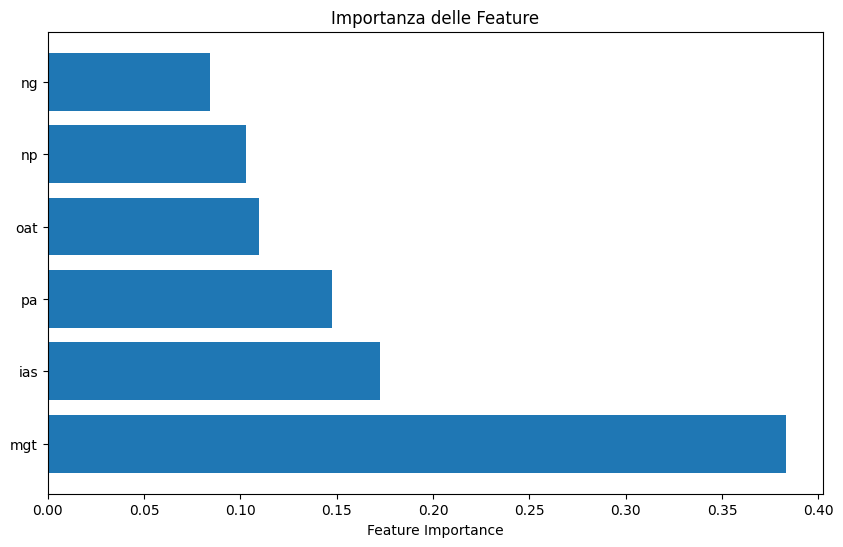

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Caricamento dei dati
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# Selezioniamo la variabile target e le feature
y = X_train_target['trq_target']
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# Suddividiamo il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione del modello Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Addestramento del modello
print("Inizio dell'addestramento del modello Random Forest...")
rf_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = rf_model.predict(X_test)

# Calcolo degli errori
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

# Visualizzazione della feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Importanza delle Feature')
plt.show()

## Support Vector Regression (SVR)

Inizio dell'addestramento del modello SVR...
Mean Squared Error: 0.18304701080264646
R^2: 0.8571243475155288


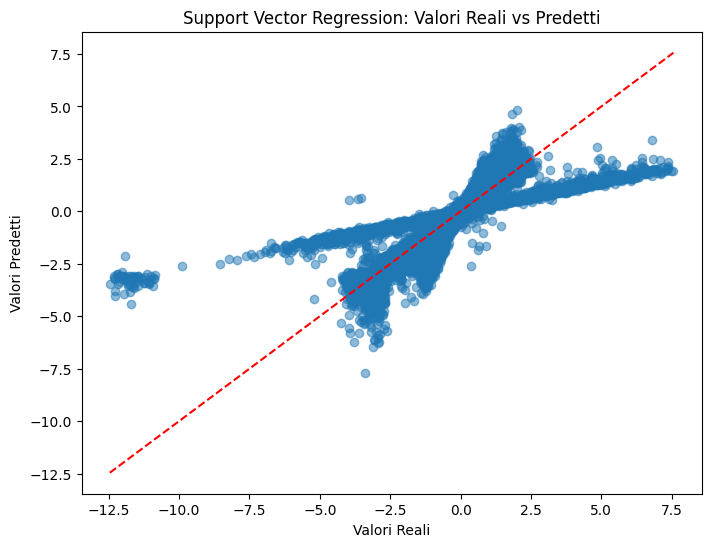

In [3]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Addestramento del modello
print("Inizio dell'addestramento del modello SVR...")
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predizione sui dati di testt
y_pred_scaled = svr_model.predict(X_test)

# Calcolo degli errori
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Support Vector Regression: Valori Reali vs Predetti')
plt.show()

## Miglior regressore

Migliori parametri per il Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

In [2]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Caricamento dei dati da CSV
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# 2. Selezioniamo solo la colonna 'trq_target' come target
y = X_train_target['trq_target'].values

# 3. Creiamo la matrice delle caratteristiche (escludiamo 'trq_measured')
X = X_train_target.drop(columns=['trq_measured', 'trq_target', 'faulty'])

# 4. Suddivisione dei dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il Random Forest Regressor con i parametri specificati
rf = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Addestra il modello
rf.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = rf.predict(X_test)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


# Percorso completo per il file del modello
model_path = 'Model/RandomForestRegressor.pkl'
# Salva il modello in formato .pkl
with open(model_path, 'wb') as file:
    pickle.dump(rf, file)

print(f"Modello salvato in: {model_path}")

KeyError: "['faulty'] not found in axis"

In [16]:
# Previsione su tutto il dataset (incluso il training set)
y_full_pred = rf.predict(X)

# Calcola il margine di coppia (trq_margin) utilizzando i valori predetti
X_train_target['trq_margin'] = 100 * (X_train_target['trq_measured'] - y_full_pred) / y_full_pred

# 6. Salva il dataset aggiornato con la nuova colonna
X_train_target.to_csv('Dataset/Train/X_train_with_trq_margin.csv', index=False)

# 7. Verifica che la colonna 'trq_margin' sia stata aggiunta
print(X_train_target.head())

   trq_measured       oat       mgt        pa       ias        np        ng  \
0      0.690790 -0.165988  0.027987 -0.925711  0.810638 -1.045463  1.280369   
1      1.473188  0.313427  2.123784 -0.312016  0.913846  0.072721  1.263805   
2     -1.466291  0.942660 -1.019912 -0.421774  0.312093 -2.094875  1.316260   
3      1.334258 -0.106061  1.710670 -0.184317  1.130757 -0.067370  1.294173   
4     -0.696288  1.435260 -0.177547  1.352120 -1.972702  0.526307 -0.842595   

   trq_target  faulty  trq_margin  
0    0.800616       0   -3.057098  
1    1.447255       0   -2.115131  
2   -1.703897       0   -6.465562  
3    1.334488       0   -7.052871  
4   -0.648782       0   -9.499112  


### PDF trq_target

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import (norm, expon, uniform, gamma, beta, lognorm, chi2, weibull_min,
                         t, f, cauchy, laplace, rayleigh, pareto, gumbel_r, logistic,
                         erlang, powerlaw, nakagami, betaprime, kstest)

# Funzione per valutare le distribuzioni e selezionare la migliore
def find_best_distribution(data, distributions):
    results = []
    
    for dist_name, dist in distributions.items():
        try:
            # Stima dei parametri della distribuzione
            params = dist.fit(data)
            # Calcolo KS test
            ks_stat, ks_pvalue = kstest(data, dist.cdf, args=params)
            results.append((dist_name, ks_stat, ks_pvalue))
        except Exception:
            results.append((dist_name, np.inf, 0))  # Errore nella stima

    # Ordina i risultati per KS statistic (più basso è meglio)
    results = sorted(results, key=lambda x: x[1])
    return results

# Dataset
file_path = "Dataset/Train/X_train_with_trq_margin.csv"
data = pd.read_csv(file_path)
if 'trq_target' in data.columns:
    trq_target = data['trq_target'].dropna()
    
    # Distribuzioni da testare
    distributions = {
        "Normal (norm)": norm,
        "Exponential (expon)": expon,
        "Uniform (uniform)": uniform,
        "Gamma (gamma)": gamma,
        "Beta (beta)": beta,
        "Log-Normal (lognorm)": lognorm,
        "Chi-Squared (chi2)": chi2,
        "Weibull (weibull_min)": weibull_min,
        "Student’s t (t)": t,
        "F (f)": f,
        "Cauchy (cauchy)": cauchy,
        "Laplace (laplace)": laplace,
        "Rayleigh (rayleigh)": rayleigh,
        "Pareto (pareto)": pareto,
        "Gumbel (gumbel_r)": gumbel_r,
        "Logistic (logistic)": logistic,
        "Erlang (erlang)": erlang,
        "Power Law (powerlaw)": powerlaw,
        "Nakagami (nakagami)": nakagami,
        "Beta Prime (betaprime)": betaprime,
    }
    
    # Trova la migliore distribuzione
    best_fit = find_best_distribution(trq_target, distributions)
    print("Distribuzioni ordinate per adattamento (KS statistic) -- trq_target:")
    for result in best_fit:
        print(f"{result[0]} - KS Stat: {result[1]:.4f}, p-value: {result[2]:.4f}")
else:
    print("La colonna 'trq_target' non è presente nel dataset.")


c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6547: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:526: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.2.
  fx = function(np.copy(x), *(wrapper_args + args))
c:\Users\lucab\AppData\Local\Programs\Python

Distribuzioni ordinate per adattamento (KS statistic):
Logistic (logistic) - KS Stat: 0.0352, p-value: 0.0000
Student’s t (t) - KS Stat: 0.0371, p-value: 0.0000
Beta (beta) - KS Stat: 0.0516, p-value: 0.0000
Normal (norm) - KS Stat: 0.0523, p-value: 0.0000
Nakagami (nakagami) - KS Stat: 0.0528, p-value: 0.0000
Log-Normal (lognorm) - KS Stat: 0.0568, p-value: 0.0000
Gamma (gamma) - KS Stat: 0.0580, p-value: 0.0000
Laplace (laplace) - KS Stat: 0.0624, p-value: 0.0000
Erlang (erlang) - KS Stat: 0.0712, p-value: 0.0000
Chi-Squared (chi2) - KS Stat: 0.0744, p-value: 0.0000
Cauchy (cauchy) - KS Stat: 0.0918, p-value: 0.0000
Weibull (weibull_min) - KS Stat: 0.1117, p-value: 0.0000
Gumbel (gumbel_r) - KS Stat: 0.2508, p-value: 0.0000
Uniform (uniform) - KS Stat: 0.4886, p-value: 0.0000
Rayleigh (rayleigh) - KS Stat: 0.4901, p-value: 0.0000
Power Law (powerlaw) - KS Stat: 0.5008, p-value: 0.0000
Beta Prime (betaprime) - KS Stat: 0.5363, p-value: 0.0000
Exponential (expon) - KS Stat: 0.5395, p-v

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lucab\AppData\Local\Temp\ipykernel_17224\2242562573.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_vals, pdf, "r--", label=f"Distribuzione Logistica\n$\mu$={loc:.2f}, scala={scale:.2f}", linewidth=2)


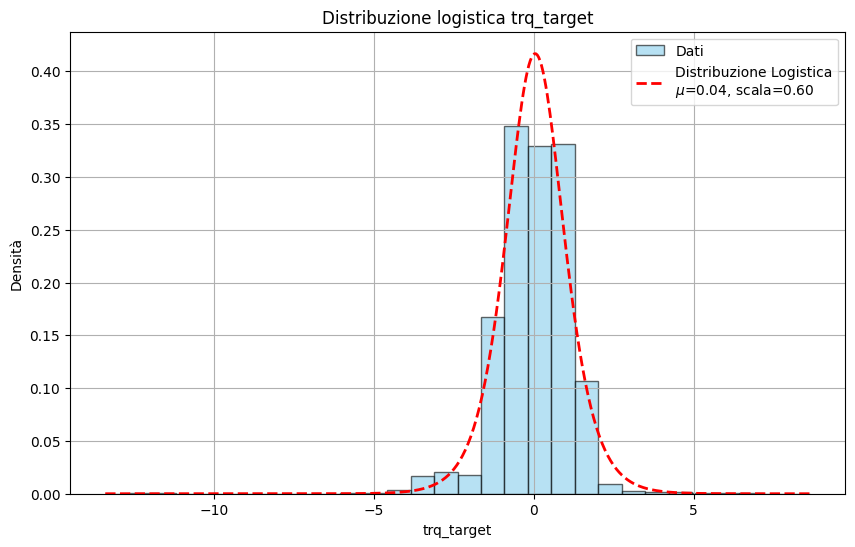

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic



# Controlla che la colonna esista
if 'trq_target' in data.columns:
    # Estrai la colonna 'trq_target' e rimuovi valori nulli
    trq_target = data['trq_target'].dropna()

    # Stima dei parametri della distribuzione logistica (media e scala)
    loc, scale = logistic.fit(trq_target)

    # Genera i valori per il grafico
    x_vals = np.linspace(trq_target.min(), trq_target.max(), 500)
    pdf = logistic.pdf(x_vals, loc, scale)

    # Traccia l'istogramma dei dati e la PDF stimata
    plt.figure(figsize=(10, 6))
    plt.hist(trq_target, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Dati")
    plt.plot(x_vals, pdf, "r--", label=f"Distribuzione Logistica\n$\mu$={loc:.2f}, scala={scale:.2f}", linewidth=2)
    
    # Configurazioni del grafico
    plt.title("Distribuzione logistica trq_target")
    plt.xlabel("trq_target")
    plt.ylabel("Densità")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("La colonna 'trq_target' non è presente nel dataset.")


### PDF trq_margin

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import (norm, expon, uniform, gamma, beta, lognorm, chi2, weibull_min,
                         t, f, cauchy, laplace, rayleigh, pareto, gumbel_r, logistic,
                         erlang, powerlaw, nakagami, betaprime, kstest)

# Funzione per valutare le distribuzioni e selezionare la migliore
def find_best_distribution(data, distributions):
    results = []
    
    for dist_name, dist in distributions.items():
        try:
            # Stima dei parametri della distribuzione
            params = dist.fit(data)
            # Calcolo KS test
            ks_stat, ks_pvalue = kstest(data, dist.cdf, args=params)
            results.append((dist_name, ks_stat, ks_pvalue))
        except Exception:
            results.append((dist_name, np.inf, 0))  # Errore nella stima

    # Ordina i risultati per KS statistic (più basso è meglio)
    results = sorted(results, key=lambda x: x[1])
    return results

# Dataset
file_path = "Dataset/Train/X_train_with_trq_margin.csv"
data = pd.read_csv(file_path)
if 'trq_margin' in data.columns:
    trq_margin = data['trq_margin'].dropna()
    
    # Distribuzioni da testare
    distributions = {
        "Normal (norm)": norm,
        "Exponential (expon)": expon,
        "Uniform (uniform)": uniform,
        "Gamma (gamma)": gamma,
        "Beta (beta)": beta,
        "Log-Normal (lognorm)": lognorm,
        "Chi-Squared (chi2)": chi2,
        "Weibull (weibull_min)": weibull_min,
        "Student’s t (t)": t,
        "F (f)": f,
        "Cauchy (cauchy)": cauchy,
        "Laplace (laplace)": laplace,
        "Rayleigh (rayleigh)": rayleigh,
        "Pareto (pareto)": pareto,
        "Gumbel (gumbel_r)": gumbel_r,
        "Logistic (logistic)": logistic,
        "Erlang (erlang)": erlang,
        "Power Law (powerlaw)": powerlaw,
        "Nakagami (nakagami)": nakagami,
        "Beta Prime (betaprime)": betaprime,
    }
    
    # Trova la migliore distribuzione
    best_fit = find_best_distribution(trq_margin, distributions)
    print("Distribuzioni ordinate per adattamento (KS statistic)  -- trq_margin:")
    for result in best_fit:
        print(f"{result[0]} - KS Stat: {result[1]:.4f}, p-value: {result[2]:.4f}")
else:
    print("La colonna 'trq_margin' non è presente nel dataset.")



c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6547: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7868: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7884: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_

Distribuzioni ordinate per adattamento (KS statistic)  -- trq_margin:
Student’s t (t) - KS Stat: 0.0269, p-value: 0.0000
Cauchy (cauchy) - KS Stat: 0.0302, p-value: 0.0000
Laplace (laplace) - KS Stat: 0.2424, p-value: 0.0000
Logistic (logistic) - KS Stat: 0.2784, p-value: 0.0000
Nakagami (nakagami) - KS Stat: 0.4525, p-value: 0.0000
Normal (norm) - KS Stat: 0.4673, p-value: 0.0000
Beta (beta) - KS Stat: 0.4684, p-value: 0.0000
Beta Prime (betaprime) - KS Stat: 0.5412, p-value: 0.0000
Gumbel (gumbel_r) - KS Stat: 0.5913, p-value: 0.0000
Log-Normal (lognorm) - KS Stat: 0.5994, p-value: 0.0000
Pareto (pareto) - KS Stat: 0.6252, p-value: 0.0000
Power Law (powerlaw) - KS Stat: 0.6297, p-value: 0.0000
Rayleigh (rayleigh) - KS Stat: 0.6300, p-value: 0.0000
Exponential (expon) - KS Stat: 0.6306, p-value: 0.0000
F (f) - KS Stat: 0.6560, p-value: 0.0000
Uniform (uniform) - KS Stat: 0.6856, p-value: 0.0000
Weibull (weibull_min) - KS Stat: 0.8928, p-value: 0.0000
Gamma (gamma) - KS Stat: 0.9972, p

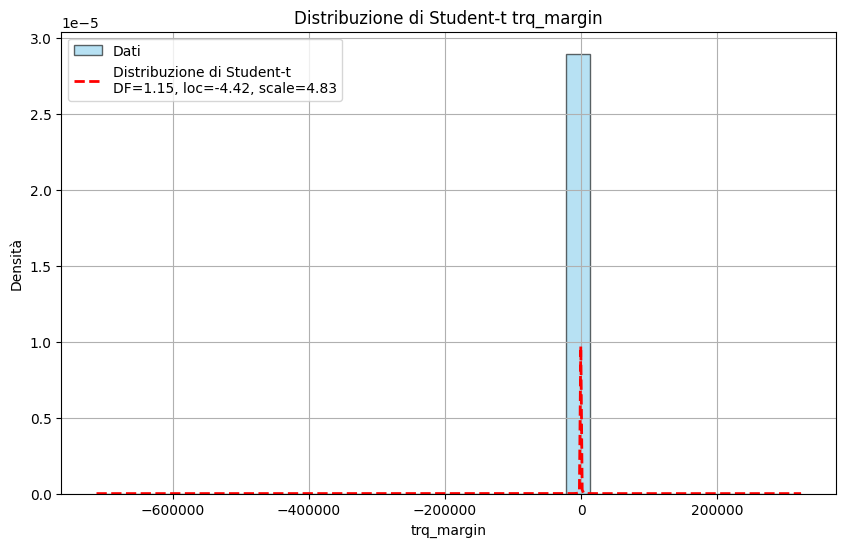

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Controlla che la colonna esista
if "trq_margin" in data.columns:
    # Estrai la colonna 'trq_margin' e rimuovi valori nulli
    trq_margin = data["trq_margin"].dropna()
    
    # Stima dei parametri della distribuzione di Student-t
    df_t, loc, scale = t.fit(trq_margin)
    
    # Genera i valori per il grafico
    x_vals = np.linspace(trq_margin.min(), trq_margin.max(), 500)
    pdf = t.pdf(x_vals, df_t, loc, scale)
    
    # Traccia l'istogramma dei dati e la PDF stimata
    plt.figure(figsize=(10, 6))
    plt.hist(trq_margin, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Dati")
    plt.plot(x_vals, pdf, "r--", label=f"Distribuzione di Student-t\nDF={df_t:.2f}, loc={loc:.2f}, scale={scale:.2f}", linewidth=2)
    
    # Configurazioni del grafico
    plt.title("Distribuzione di Student-t trq_margin")
    plt.xlabel("trq_margin")
    plt.ylabel("Densità")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("La colonna 'trq_margin' non è presente nel dataset.")


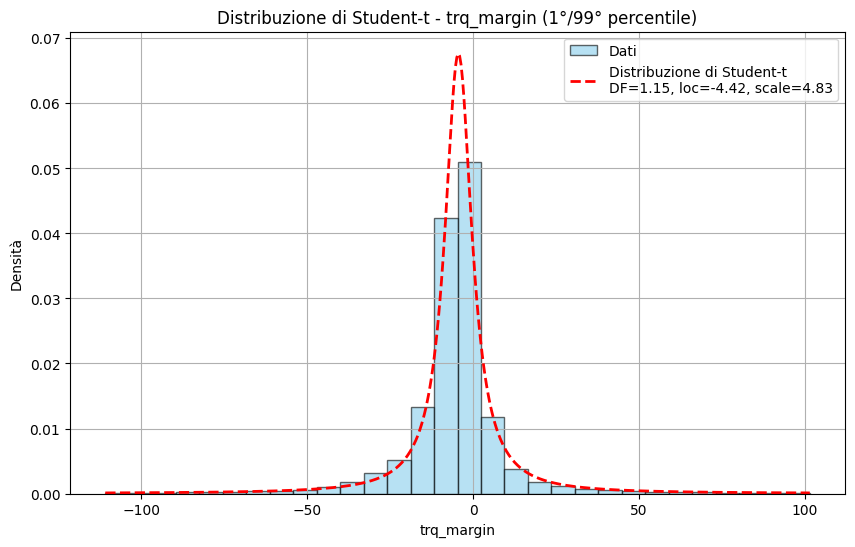

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Controlla che la colonna esista
if "trq_margin" in data.columns:
    # Estrai la colonna 'trq_margin' e rimuovi valori nulli
    trq_margin = data["trq_margin"].dropna()
    
    # Stima dei parametri della distribuzione di Student-t
    df_t, loc, scale = t.fit(trq_margin)
    
    # Definisci un range più ristretto per x_vals
    lower_bound = np.percentile(trq_margin, 1)  # 1° percentile
    upper_bound = np.percentile(trq_margin, 99)  # 99° percentile
    x_vals = np.linspace(lower_bound, upper_bound, 500)
    
    pdf = t.pdf(x_vals, df_t, loc, scale)
    
    # Traccia l'istogramma dei dati e la PDF stimata
    plt.figure(figsize=(10, 6))
    plt.hist(trq_margin, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Dati", range=(lower_bound, upper_bound))
    plt.plot(x_vals, pdf, "r--", label=f"Distribuzione di Student-t\nDF={df_t:.2f}, loc={loc:.2f}, scale={scale:.2f}", linewidth=2)
    
    # Configurazioni del grafico
    plt.title("Distribuzione di Student-t - trq_margin (1°/99° percentile)")
    plt.xlabel("trq_margin")
    plt.ylabel("Densità")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("La colonna 'trq_margin' non è presente nel dataset.")


### Risultati regressore migliore

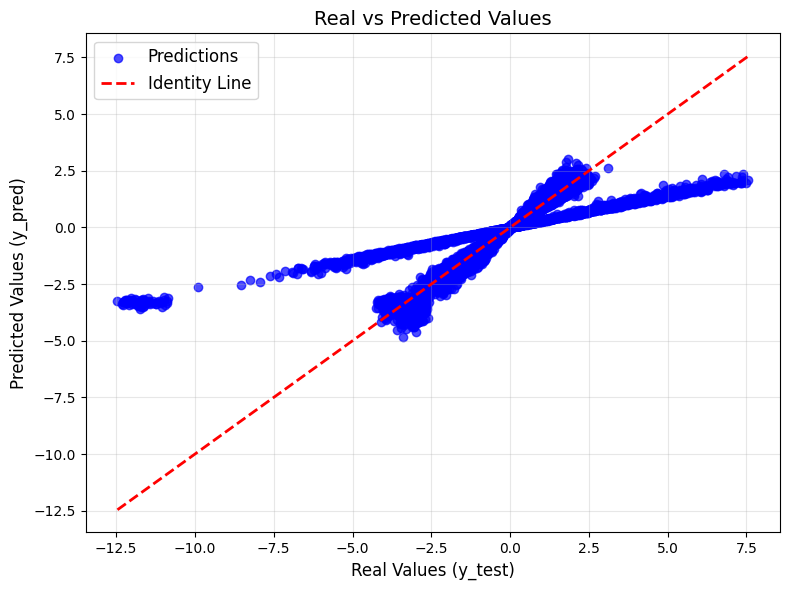

In [8]:
import matplotlib.pyplot as plt

# Crea il grafico per confrontare i valori reali e le previsioni
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Identity Line')
plt.title('Real vs Predicted Values', fontsize=14)
plt.xlabel('Real Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
import pickle

# Salva il modello
with open('Model/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Per caricare il modello
with open('Model/random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Verifica se il modello caricato funziona
print("R2 score (loaded model):", r2_score(y_test, rf_loaded.predict(X_test)))


R2 score (loaded model): 0.8709930428392307
